In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import pandas as pd
import numpy as np

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
image = cle.push(imread('blobs.tif'))
labels = cle.push(imread('labels.tif'))
annotation = cle.push(imread('label_annotation.tif'))

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


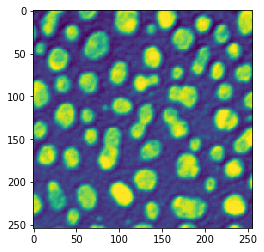

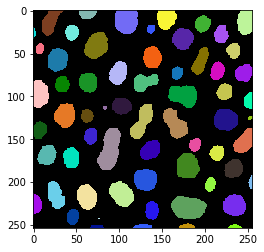

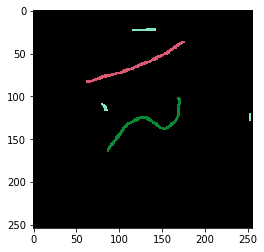

In [3]:
cle.imshow(image)
cle.imshow(labels, labels=True)
cle.imshow(annotation, labels=True)

In [4]:
from apoc import ObjectClassifier

features = 'area,mean_max_distance_to_centroid_ratio,standard_deviation_intensity'

classifier = ObjectClassifier("hello_world.model.cl")
classifier.train(features, labels, annotation, image)

C:\Users\rober\miniconda3\envs\bio2\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:283: RuntimeWarning: invalid value encountered in true_divide
  region_props['mean_max_distance_to_centroid_ratio'] = region_props['max_distance_to_centroid'] / region_props[
C:\Users\rober\miniconda3\envs\bio2\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:285: RuntimeWarning: invalid value encountered in true_divide
  region_props['mean_max_distance_to_mass_center_ratio'] = region_props['max_distance_to_mass_center'] / region_props[
C:\Users\rober\miniconda3\envs\bio2\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


C:\Users\rober\miniconda3\envs\bio2\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:283: RuntimeWarning: invalid value encountered in true_divide
  region_props['mean_max_distance_to_centroid_ratio'] = region_props['max_distance_to_centroid'] / region_props[
C:\Users\rober\miniconda3\envs\bio2\lib\site-packages\pyclesperanto_prototype\_tier9\_statistics_of_labelled_pixels.py:285: RuntimeWarning: invalid value encountered in true_divide
  region_props['mean_max_distance_to_mass_center_ratio'] = region_props['max_distance_to_mass_center'] / region_props[


3.0


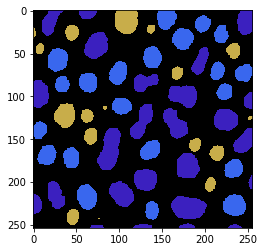

In [5]:
# this line is not necessary in this particular example:
classifier = ObjectClassifier("hello_world.model.cl")


result = classifier.predict(labels, image)

print(result.max())

cle.imshow(result, labels=True)